### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset from CSV

In [2]:
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

### Showing all rows and columns if needed

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Data Exploration
#### Data Shape

In [4]:
print(f'Number of rows => {df_train.shape[0]}')
print(f'Number of columns => {df_train.shape[1]}')

Number of rows => 1460
Number of columns => 81


#### Null Values per columns and data type

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Most of the null values of the dataframe is due that the values was "None" when tha house did not have the feature and at importing time the value was cataloged as null.

#### Summary Stats

In [6]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

#### Sample of the data. (First 5 rows)

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check for duplication and null values

In [8]:
df_train.duplicated().sum()

0

No duplicate values

#### Checking for null values

In [9]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Exploring columns with null values to determine what to do with them

#### Null values of numerical columsn that will need to be imputed

- LotFrontage => Linear feet of street connected to property. Probably use KNN to impute the null values
- Electrical => Electrical system. Probably use KNN to impute the null values 
- MasVnrArea => Masonry veneer area in square feet. Probably use KNN to impute the null values 
- GarageYrBlt => NA means No Garage. Null values will be converted to 0

#### Null values of categorical columns that need to be changed

- Alley column maens NA => No alley access. Null values will be converted to NAA(No Alley Access)
- MasVnrType => None means No Masonry veneer type. Null values will be converted to NMV(No Masonry veneer)
- BsmtQual => NA means No Basement. Null values will be converted to NB(No Basement)        
- BsmtCond => NA means No Basement. Null values will be converted to NB(No Basement)         
- BsmtExposure => NA means No Basement. Null values will be converted to NB(No Basement)
- BsmtFinType1 & BsmtFinType2 => NA means No Basement. Null values will be converted to NB(No Basement)
- FireplaceQu => NA means No Fireplace. Null values will be converted to NF(No Fireplace)

- GarageType => NA means No Garage. Null values will be converted to NG(No Garage)
- GarageFinish => NA means No Garage. Null values will be converted to NG(No Garage)
- GarageQual => NA means No Garage. Null values will be converted to NG(No Garage)
- GarageCond => NA means No Garage. Null values will be converted to NG(No Garage)

- PoolQC => NA means No PoolQC. Null values will be converted to NPQC(No Pool)
- Fence => NA means No Fence. Null values will be converted to NF(No Fence)
- MiscFeature => NA means None, No Mis. Features. Null values will be converted to NMF(No Mis. Features)

### Changing null values for categorical columns

In [10]:
df_train.Alley = df_train.Alley.fillna('NAA')
df_train.MasVnrType = df_train.MasVnrType.fillna('NMV')
df_train.BsmtQual = df_train.BsmtQual.fillna('NB')
df_train.BsmtCond = df_train.BsmtCond.fillna('NB')
df_train.BsmtExposure = df_train.BsmtExposure.fillna('NB')
df_train.BsmtFinType1 = df_train.BsmtFinType1.fillna('NB')
df_train.BsmtFinType2 = df_train.BsmtFinType2.fillna('NB')

In [11]:
df_train.FireplaceQu = df_train.FireplaceQu.fillna('NF')
df_train.GarageType = df_train.GarageType.fillna('NG')
df_train.GarageFinish = df_train.GarageFinish.fillna('NG')
df_train.GarageQual = df_train.GarageQual.fillna('NG')
df_train.GarageCond = df_train.GarageCond.fillna('NG')

In [12]:
df_train.PoolQC = df_train.PoolQC.fillna('NP')
df_train.Fence = df_train.Fence.fillna('NF')
df_train.MiscFeature = df_train.MiscFeature.fillna('NMF')

In [13]:
# Check if changes took effect
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

### Imputing and changing values in numerical columns

In [14]:
df_train.GarageYrBlt = df_train.GarageYrBlt.fillna(0)

In [15]:
# Importing random library
import random

In [16]:
# Getting the list of the column values for the Electrical column
list_of_electric_f = df_train.Electrical.unique()
list_of_electric_f

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [17]:
"""
For the only null value on the Electrical column 
choosing a value randomly to fill that null value
"""
feature = random.randint(0,5) # Getting a random number from 0 to 4
df_train.Electrical = df_train.Electrical.fillna(list_of_electric_f[feature])

In [18]:
# Importing the KNNImputer class from sklearn
from sklearn.impute import KNNImputer

In [19]:
# Function to impute columns for dataframes
def column_knn_imputer(df):
    imputer = KNNImputer()
    columns_to_impute = list(df.columns[df.isnull().any()])
    
    df_imputed = df.copy(deep=True)
    # Impute using fit_transform on the df_imputed
    df_imputed.loc[:, columns_to_impute] = imputer.fit_transform(df.loc[:, columns_to_impute])
    
    return df_imputed

In [20]:
# Imputing the values
df = column_knn_imputer(df_train)

In [21]:
df.isnull().sum().sum()

0

No Null values on the data set.
> Ready for EDA 

### EDA
### Univariate Stats

In [22]:
"""
Function to get summary stats
This function will show more infrmation than the "describe" method provided by pandas
"""
def get_summary_stats_by_columns(df):
    column_name = df.columns
    new_df = pd.DataFrame(index=['Data type', 'Min', '25%', '50%', '75%','Max', 'Mean', 'Median', 'Mode', 
                                 'Unique Values Num', 'STD', 'Skewness', 'Kurtosis'])
    for col in column_name:
        if pd.api.types.is_numeric_dtype(df[col]):
            new_df[col.upper()] = [df[col].dtype, df[col].min(), df[col].quantile(.25), df[col].quantile(.5), 
                                   df[col].quantile(.75),df[col].max(), df[col].mean(), df[col].median(),
                                   df[col].mode()[0], df[col].nunique(), df[col].std(), df[col].skew(), 
                                   df[col].kurt()]
    return new_df

In [23]:
get_summary_stats_by_columns(df)

,ID,MSSUBCLASS,LOTFRONTAGE,LOTAREA,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,MASVNRAREA,BSMTFINSF1,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,TOTRMSABVGRD,FIREPLACES,GARAGEYRBLT,GARAGECARS,GARAGEAREA,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,MISCVAL,MOSOLD,YRSOLD,SALEPRICE
Data type,int64,int64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
Min,1,20,21.0,1300,1,1,1872,1950,0.0,0,0,0,0,334,0,0,334,0,0,0,0,0,0,2,0,0.0,0,0,0,0,0,0,0,0,0,1,2006,34900
25%,365.75,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.75,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1958.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,71.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1977.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.25,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.25,0.0,808.0,1298.25,1391.25,728.0,0.0,1776.75,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2001.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
Max,1460,190,313.0,215245,10,9,2010,2010,1600.0,5644,1474,2336,6110,4692,2065,572,5642,3,2,3,2,8,3,14,3,2010.0,4,1418,857,547,552,508,480,738,15500,12,2010,755000
Mean,730.5,56.89726,70.57226,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.933541,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
Median,730.5,50.0,71.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1977.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
Mode,1,20,60.0,7200,5,5,2006,1950,0.0,0,0,0,0,864,0,0,864,0,0,2,0,3,1,6,0,0.0,2,0,0,0,0,0,0,0,0,6,2009,140000
Unique Values Num,1460,15,171,1073,10,9,112,61,333,637,144,780,721,753,417,24,861,4,3,4,3,8,4,12,4,98,5,441,274,202,120,20,76,8,21,12,5,663


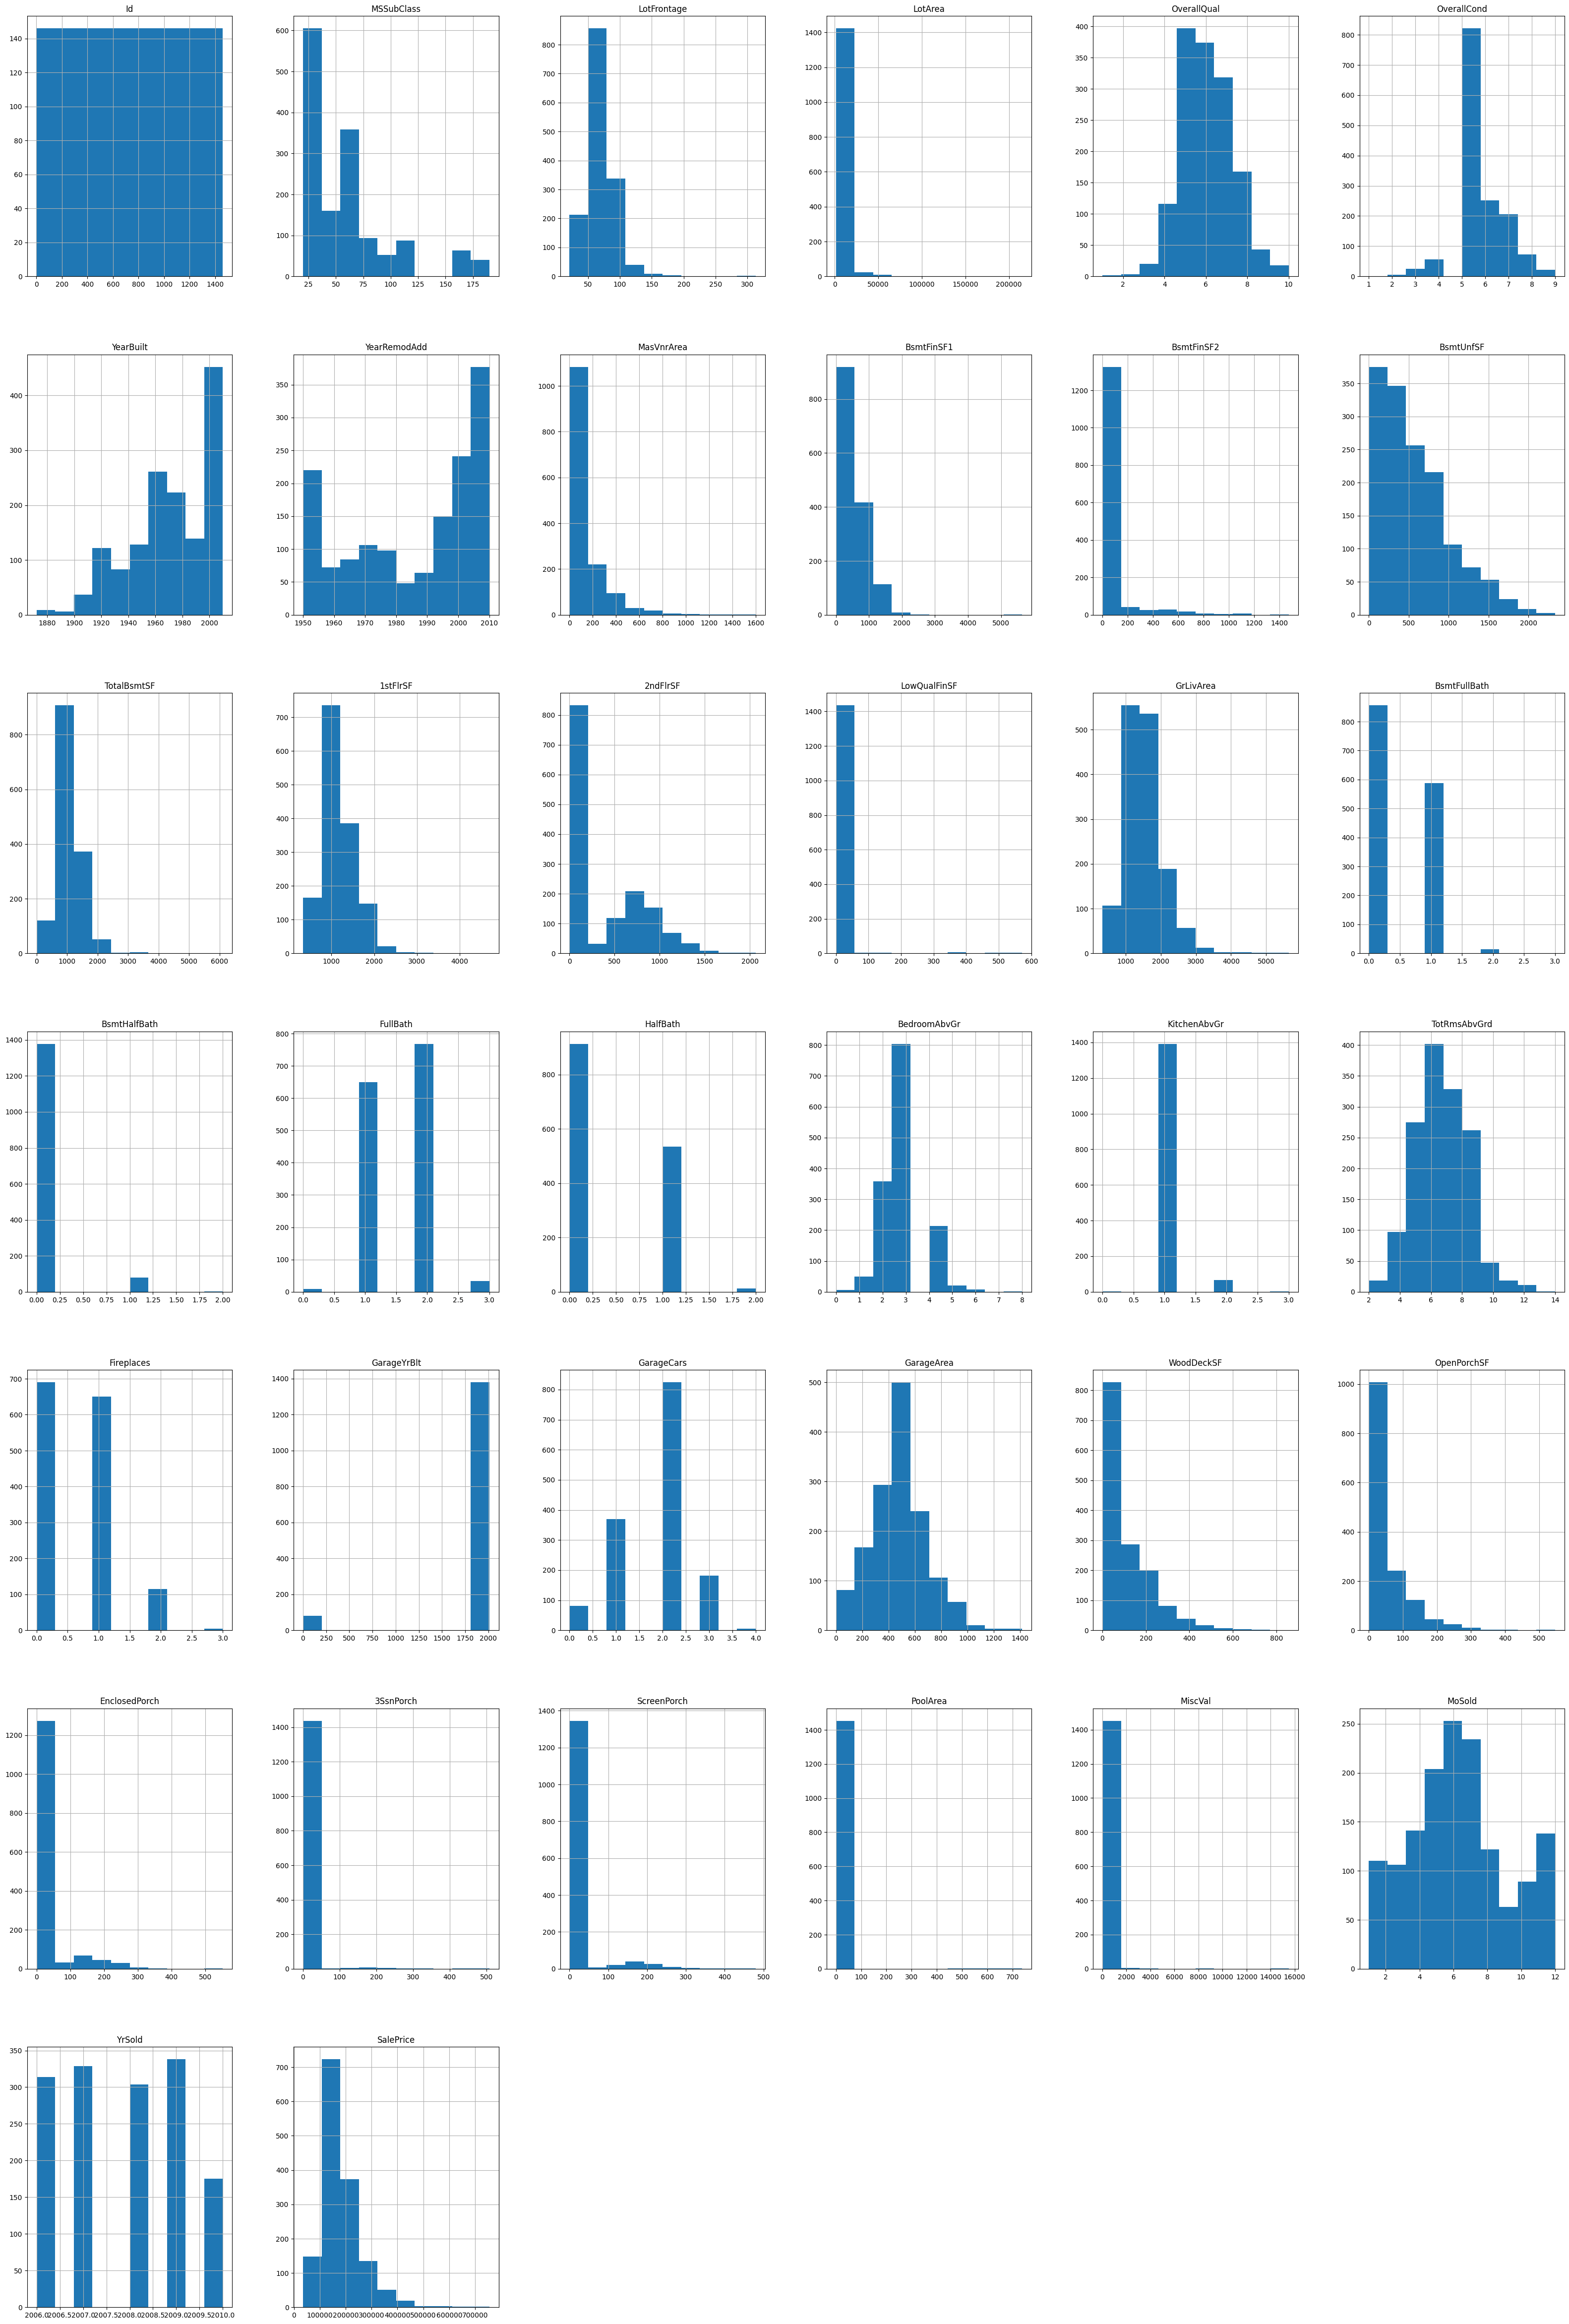

In [24]:
# Histogram chart for EDA
df.hist(figsize=(40,60));

In [25]:
df.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Boxplot to treat some outliers

In [26]:
# Function to find the upper bound of a column
def upper_bound(data_frame, column_name):
    q75, q25= np.percentile(data_frame[column_name], [75, 25])
    iqr = q75 - q25

    return q75 + (iqr * 1.5)

#### LotFrontage column

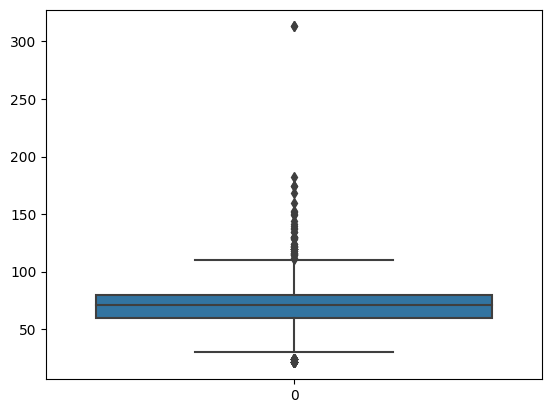

In [27]:
sns.boxplot(df.LotFrontage);

In [28]:
len(df[df.LotFrontage > upper_bound(df, "LotFrontage")])

47

In [29]:
up_bound = upper_bound(df, "LotFrontage")

In [30]:
df.drop(df[df.LotFrontage > up_bound].index, inplace=True)

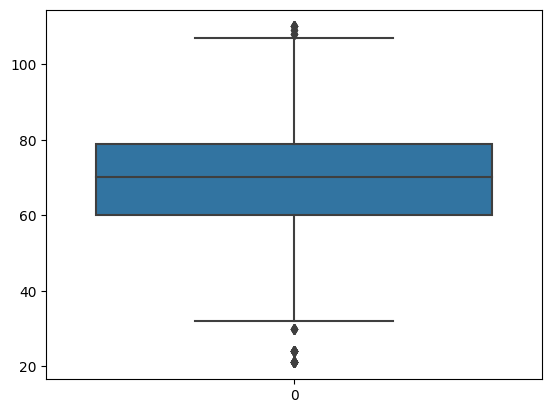

In [31]:
sns.boxplot(df.LotFrontage);

#### LotArea

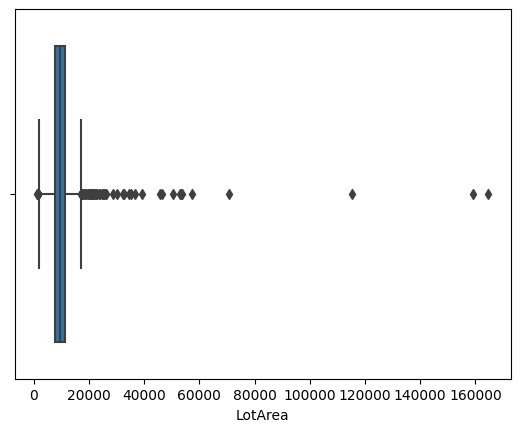

In [32]:
sns.boxplot(x=df.LotArea);

In [33]:
len(df[df.LotArea > upper_bound(df, 'LotArea')])

60

In [34]:
df.drop(df[df.LotArea > upper_bound(df, 'LotArea')].index, inplace=True)

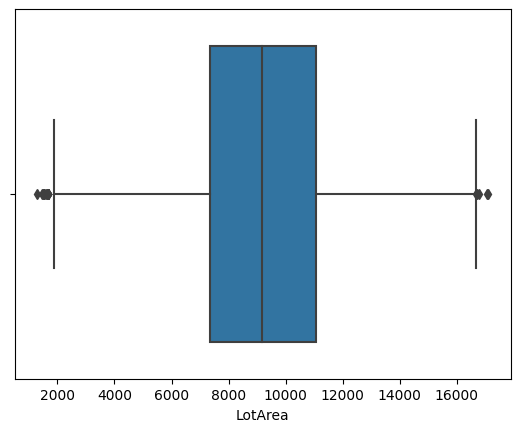

In [35]:
sns.boxplot(x=df.LotArea);

#### MASVNRAREA

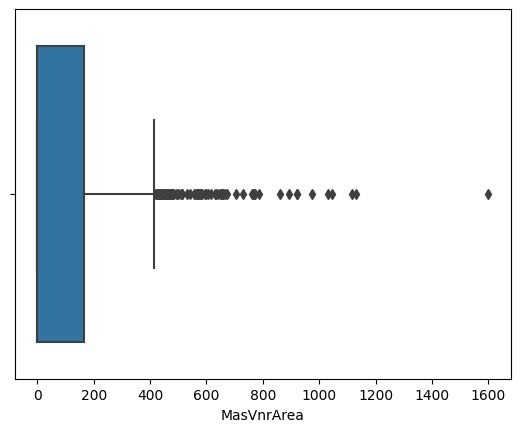

In [36]:
sns.boxplot(x=df.MasVnrArea);

In [37]:
len(df[df.MasVnrArea > upper_bound(df, 'MasVnrArea')])

84

In [38]:
df.drop(df[df.MasVnrArea > upper_bound(df, 'MasVnrArea')].index, inplace=True)

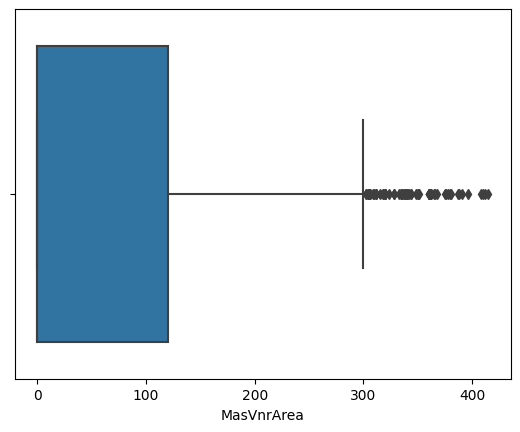

In [39]:
sns.boxplot(x=df.MasVnrArea);

#

### Graph for categorical variables

In [40]:
df.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269
unique,5,2,3,4,4,1,5,3,25,9,6,5,8,5,4,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,6,6,7,4,6,6,3,3,5,5,9,6
top,RL,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NMV,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NF,Attchd,Unf,TA,TA,Y,NP,NF,NMF,WD,Normal
freq,983,1266,1185,838,1163,1269,939,1219,207,1100,1257,1051,633,1030,1259,445,434,804,815,1116,556,588,1134,862,384,1091,1240,622,1178,1152,662,1183,656,732,553,1128,1141,1164,1266,1007,1221,1110,1050


In [41]:
len(df.describe(exclude='number').columns)

43

In [42]:
cat_columns = list(df.describe(exclude='number').columns)
cat_columns.remove('Condition2')
len(cat_columns)

42

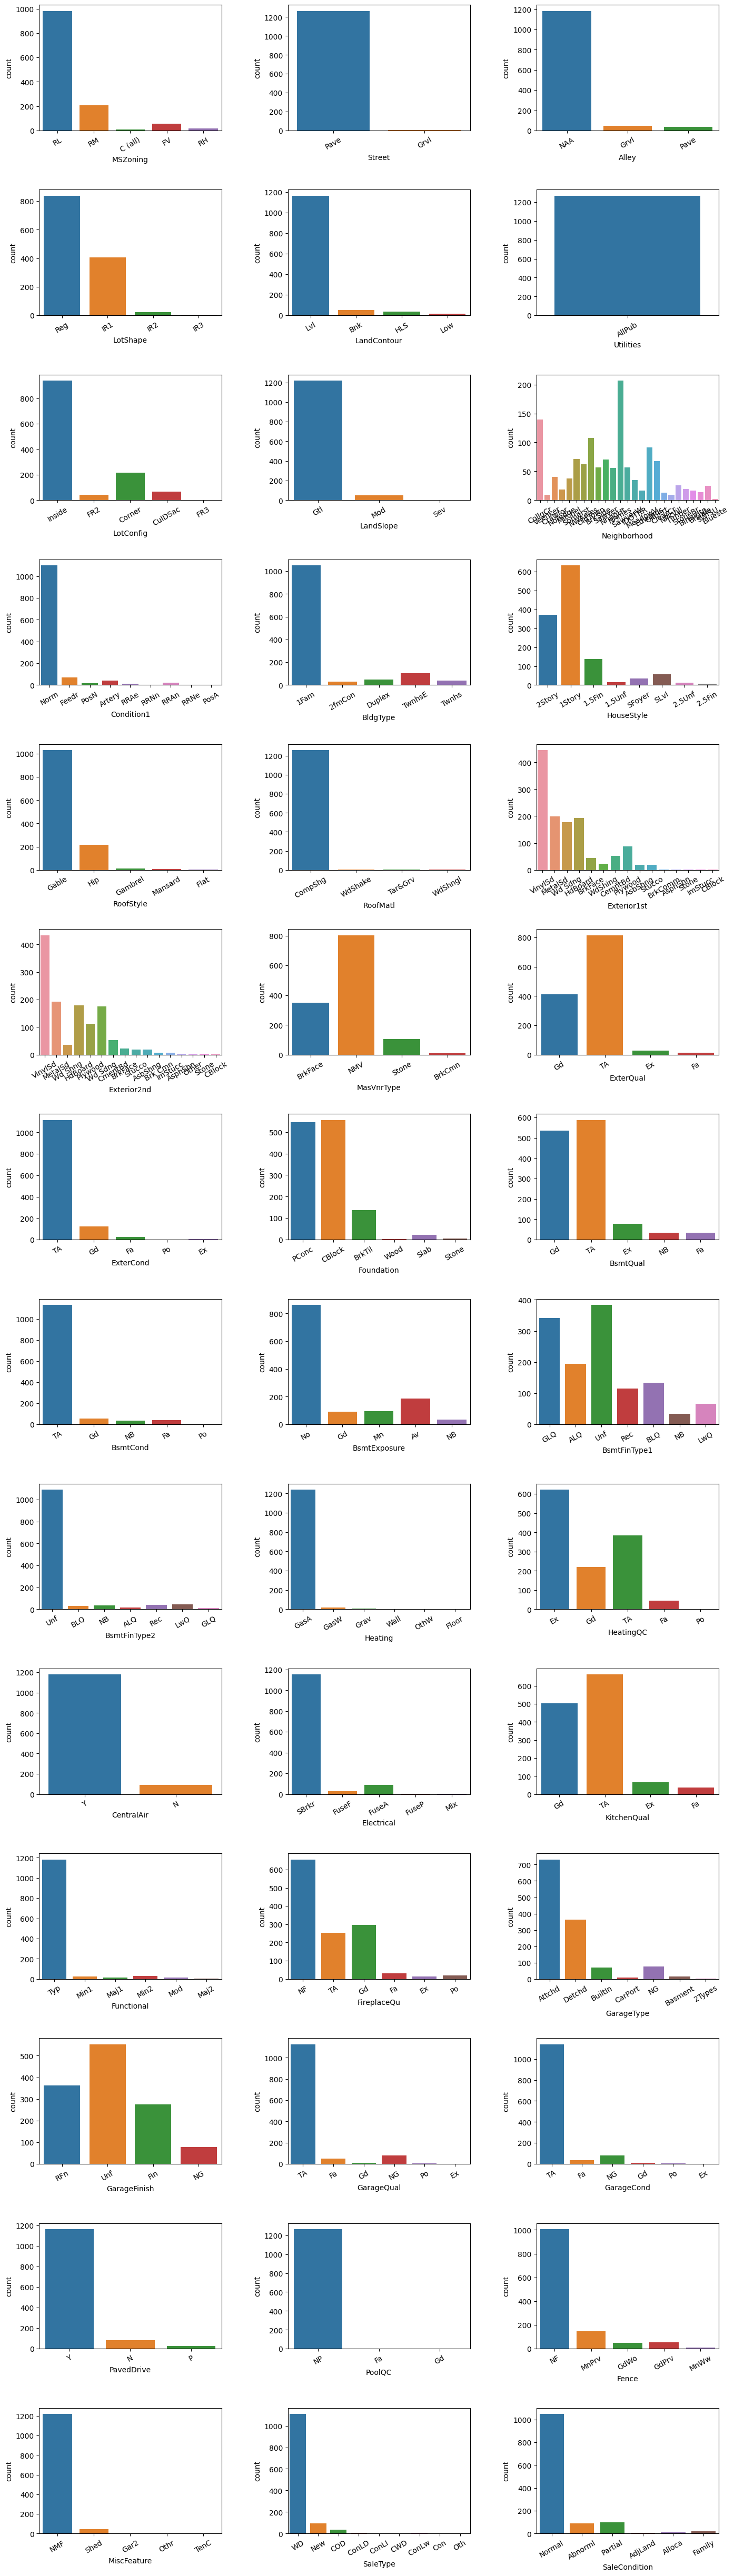

In [43]:
fig, ax = plt.subplots(nrows = 14, ncols = 3, figsize =(15,50))
fig.tight_layout(pad=6.0)
i = 0
for row in range(14):
    for col in range(3):
        g = sns.countplot(x=cat_columns[i], data=df, ax = ax[row,col]);
        g.set_xticklabels(g.get_xticklabels(), rotation=30)
        i += 1
plt.show()

#

### Bivariate Graphs

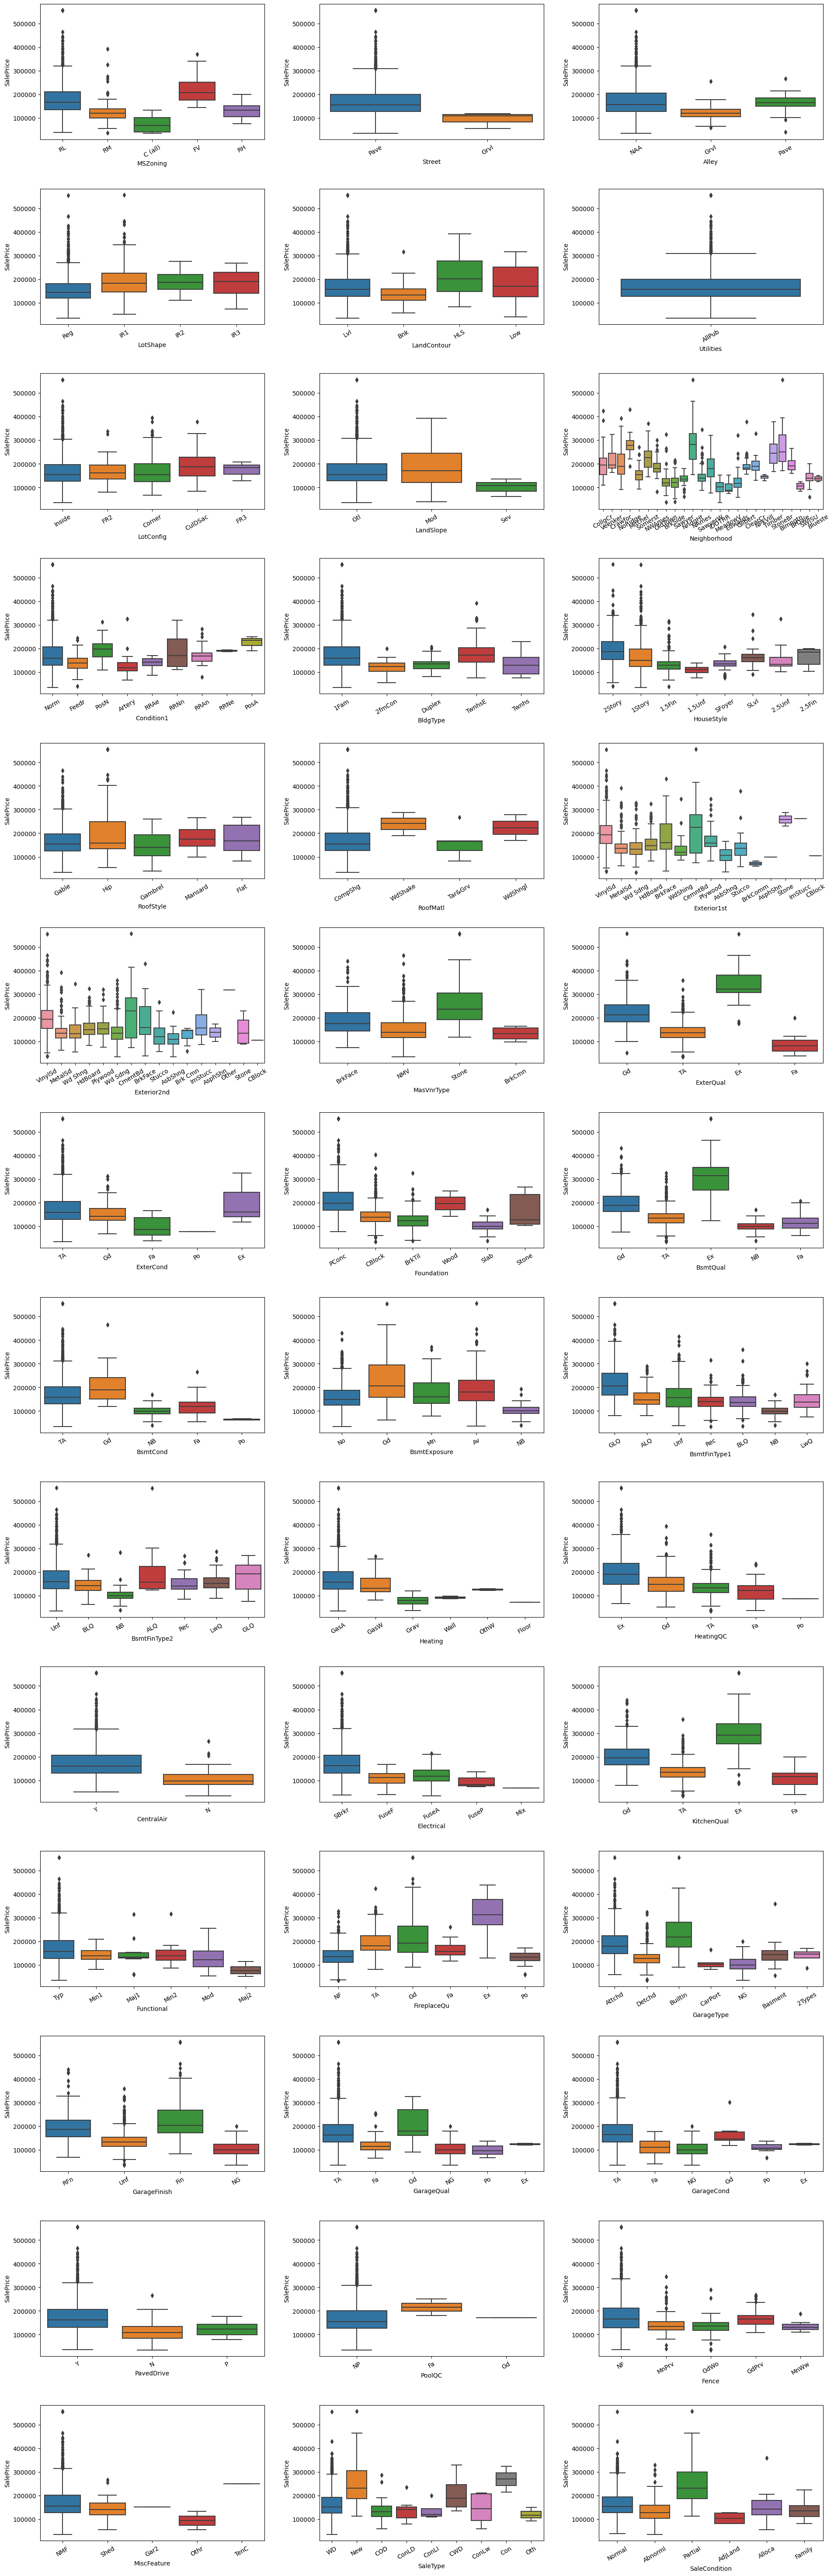

In [44]:
fig, ax = plt.subplots(nrows = 14, ncols = 3, figsize =(20,60))
fig.tight_layout(pad=6.0)
i = 0
for row in range(14):
    for col in range(3):
        g = sns.boxplot(x=cat_columns[i], y='SalePrice', data=df, ax = ax[row,col]);
        g.set_xticklabels(g.get_xticklabels(), rotation=30)
        i += 1
plt.show()

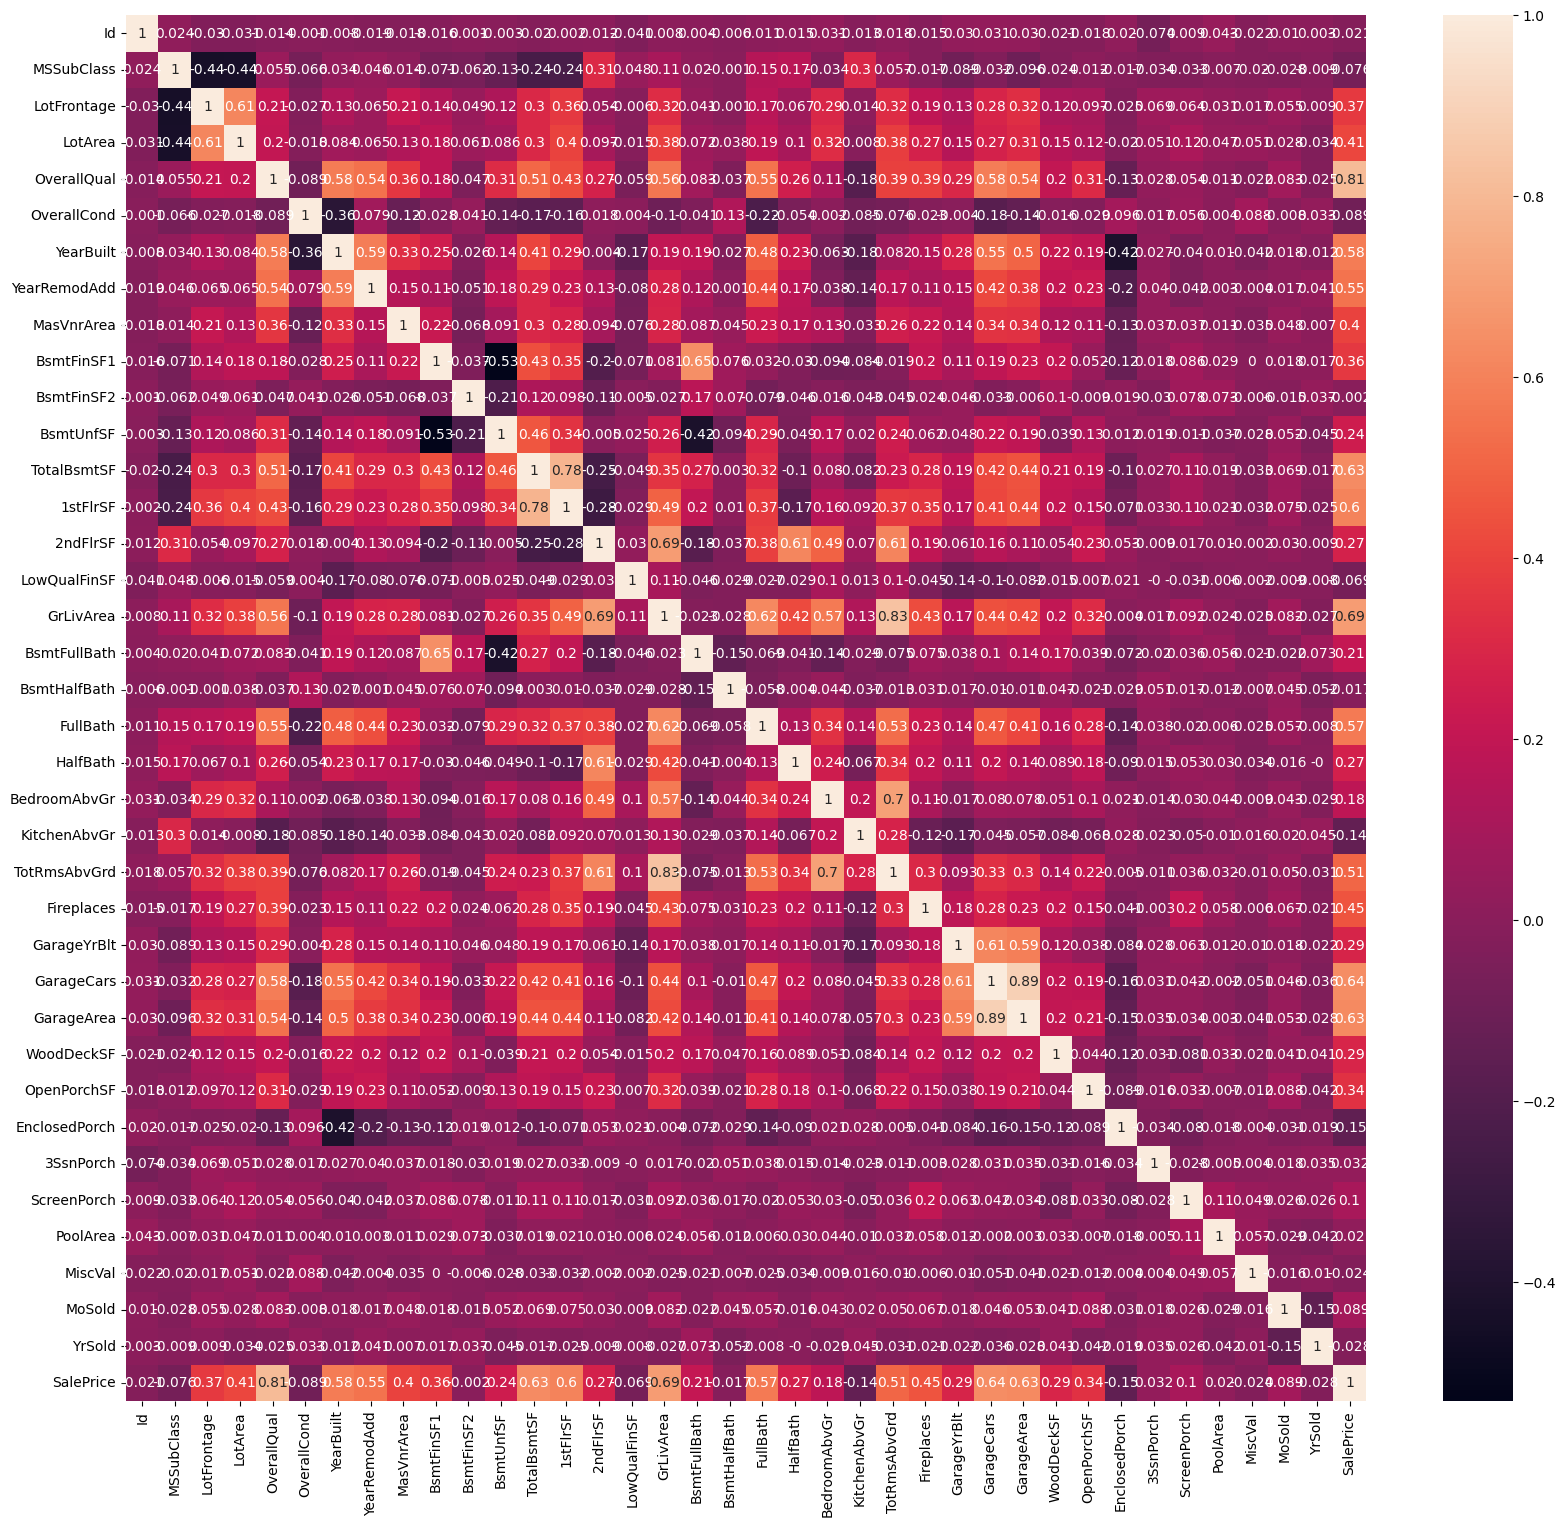

In [45]:
plt.figure(figsize=(20,18))
sns.heatmap(df[df.describe().columns].corr().round(3), annot=True);

#

### Wrangling Data

In [46]:
df.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269
unique,5,2,3,4,4,1,5,3,25,9,6,5,8,5,4,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,6,6,7,4,6,6,3,3,5,5,9,6
top,RL,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NMV,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NF,Attchd,Unf,TA,TA,Y,NP,NF,NMF,WD,Normal
freq,983,1266,1185,838,1163,1269,939,1219,207,1100,1257,1051,633,1030,1259,445,434,804,815,1116,556,588,1134,862,384,1091,1240,622,1178,1152,662,1183,656,732,553,1128,1141,1164,1266,1007,1221,1110,1050


In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
encoder = OrdinalEncoder()

In [49]:
df[['Street', 'CentralAir']] = encoder.fit_transform(df[['Street', 'CentralAir']])

In [50]:
# Drooping variable that has only one unique value "Utilities" and other redundant variables for the data set
df.drop(columns=['Utilities', 'Condition2', 'Exterior2nd', 'BsmtFinType2',
                'GarageCars', 'YearRemodAdd', 'BsmtFinSF2'], inplace=True)

In [54]:
import scipy.stats as stats

# Assuming 'dependent_var' and 'independent_var' are the column names in your DataFrame
dependent_var = df.SalePrice
independent_var = df.Neighborhood

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*[dependent_var[independent_var == category] for category in np.unique(independent_var)])

print("F-statistic:", f_statistic)
print("p-value:", round(p_value, 8))

F-statistic: 61.505063765267266
p-value: 0.0


In [55]:
dummy_nom_list = df.describe(exclude='number').columns
dummy_nom_list

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [56]:
for col in  dummy_nom_list:
    df = pd.concat([df.drop(col, axis = 1),
        pd.get_dummies(df[col], prefix = col, prefix_sep = '_', drop_first = True, dummy_na = False)], axis=1)

In [57]:
dummy_nom_list2 = df.describe(exclude='number').columns

In [58]:
df.Neighborhood_Blueste.dtype

dtype('bool')

In [59]:
df[dummy_nom_list2] = df[dummy_nom_list2].astype(int)

In [60]:
len(df.columns)

222

#### Reordering the columns to put SalePrice at the end of the DataFrame

In [61]:
# Assuming 'df' is your DataFrame and 'specific_column' is the column you want to move

# Step 1: Get the list of all columns in the DataFrame except 'specific_column'
cols = [col for col in df.columns if col != 'SalePrice']

# Step 2: Add 'specific_column' to the end of the list
cols.append('SalePrice')

# Step 3: Reorder the DataFrame using the new column order
df = df[cols]


#

### Feature Selection

In [62]:
# Importing module
from sklearn.feature_selection import SelectKBest, f_regression
skbest = SelectKBest(f_regression, k='all')

In [63]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [64]:
# Fit the data
result = skbest.fit_transform(X, y)

In [65]:
# Making a DataFrame with the result
p_values = pd.DataFrame({'Feature': X.columns,
                         'p_values': skbest.pvalues_}).sort_values('p_values')

In [66]:
pvalues_df = p_values[p_values.p_values < 0.05]

In [67]:
pvalues_df.reset_index(drop=True)

,Feature,p_values
0,OverallQual,1.171940e-291
1,GrLivArea,1.977536e-179
2,TotalBsmtSF,1.034543e-142
3,GarageArea,1.987579e-140
4,ExterQual_TA,1.604475e-134
5,1stFlrSF,7.202763e-126
6,YearBuilt,3.172063e-114
7,FullBath,1.124264e-111
8,ExterQual_Gd,1.193343e-97
9,KitchenQual_TA,5.731803e-96


In [69]:
feature_to_keep = p_values['Feature'][p_values['p_values'] < 0.05]
feature_to_keep = list(feature_to_keep)

### Making a new X with the features to keep

In [70]:
X_new = df.loc[:, feature_to_keep]

### Importing modules for the modeling

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Splitting the data set

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=111)

### Parameters to tune the model 

In [73]:
# Define the dictionary 'params_rf'
params_rf = {
             'rfr__n_estimators': [50, 100, 200, 350, 500],
             'rfr__max_features': ['log2', 'sqrt'],
             'rfr__min_samples_leaf': [2, 10, 30],
             'rfr__max_depth': [2,4,6],
             }

In [74]:
# Making a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfr', RandomForestRegressor())
])

In [75]:
# Running a ne model to find the best params
rfr_cv = GridSearchCV(pipeline, param_grid=params_rf, cv=5, n_jobs=-1)

In [76]:
# Fiting the model
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfr', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [2, 4, 6],
                         'rfr__max_features': ['log2', 'sqrt'],
                         'rfr__min_samples_leaf': [2, 10, 30],
                         'rfr__n_estimators': [50, 100, 200, 350, 500]})

In [77]:
print(rfr_cv.best_estimator_)
print(rfr_cv.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(max_depth=6, max_features='sqrt',
                                       min_samples_leaf=2, n_estimators=50))])
0.8379148860534448


### Scores with training data

In [78]:
print(f'R-Squared score -> {r2_score(y_train, rfr_cv.predict(X_train))}')
print(f'MSE -> {mean_squared_error(y_train, rfr_cv.predict(X_train))}')
print(f'RMSE -> {mean_squared_error(y_train, rfr_cv.predict(X_train))**(1/2)}')

R-Squared score -> 0.8983145731362212
MSE -> 427406560.0688498
RMSE -> 20673.81338962045


### Scores with test data

In [79]:
# Make prediction with the new model
y_pred_new = rfr_cv.predict(X_test)

In [80]:
print(f'R-Squared score -> {r2_score(y_test, y_pred_new)}')
print(f'MSE -> {mean_squared_error(y_test, y_pred_new)}')
print(f'RMSE -> {mean_squared_error(y_test, y_pred_new)**(1/2)}')

R-Squared score -> 0.8075622921888254
MSE -> 945060259.3748043
RMSE -> 30741.832401059055


### Most important features

In [81]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('rfr_f', RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=2, n_estimators=50))]

In [82]:
pipeline_final = Pipeline(steps)

In [83]:
rfr_f = pipeline_final.fit(X_train, y_train)

In [84]:
rfr_f.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr_f',
                 RandomForestRegressor(max_depth=6, max_features='sqrt',
                                       min_samples_leaf=2, n_estimators=50))])

In [85]:
rfr_f.score(X_test, y_test)

0.8219757052403145

In [86]:
feature_importance = pd.Series(data=rfr_f.named_steps.rfr_f.feature_importances_, index=X_train.columns)

In [90]:
feature_importance.sort_values()# plot(kind='barh', color='lightgreen');
# plt.title('Feature of Importance')

Street                   0.000000e+00
GarageQual_Fa            0.000000e+00
BsmtFinType1_Rec         0.000000e+00
HouseStyle_1.5Unf        0.000000e+00
Heating_Grav             0.000000e+00
Functional_Maj2          0.000000e+00
MiscFeature_NMF          0.000000e+00
GarageCond_Po            0.000000e+00
MSZoning_RH              0.000000e+00
SaleCondition_AdjLand    0.000000e+00
BsmtCond_Po              0.000000e+00
Exterior1st_WdShing      0.000000e+00
SaleType_Con             0.000000e+00
SaleCondition_Family     0.000000e+00
Neighborhood_Veenker     0.000000e+00
Exterior1st_BrkComm      0.000000e+00
Functional_Min1          0.000000e+00
Neighborhood_Sawyer      2.265821e-08
LowQualFinSF             2.093370e-07
Heating_Wall             1.934159e-06
PavedDrive_P             2.618492e-06
LotConfig_CulDSac        3.490565e-06
GarageCond_Fa            6.985425e-06
Neighborhood_BrDale      7.314404e-06
BldgType_2fmCon          1.179363e-05
GarageType_NG            1.519373e-05
HouseStyle_S